## Machine Learning Modelling

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from skopt import BayesSearchCV


Load data file into dataframe.

In [3]:
df=pd.read_csv('Data/wb_gender_data_cleaned.csv')

Split the data into X as features, and y as the target variable.

In [4]:
X = df.drop(['Country Name','Female share of employment in senior and middle management (%)'],axis=1)


X2 was created by standardsing the data.

In [5]:
mapper = DataFrameMapper([(X.columns, StandardScaler())])
scaled_features = mapper.fit_transform(X.copy())
X2 = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

X3 is a version with a reduced number of columns.

In [6]:
X3 = X.iloc[:,:20]

I used Principal component analysis (PCA) to create a dataset with a reduced number of features. This was created to try to reduce the amount of overfitting in the ML models.

In [7]:
pca = PCA(n_components=10).set_output(transform="pandas")
pca.fit(X2)
X4 = pca.transform(X2)

In [8]:
X4_var = X4.var(axis=0)
X4_var

pca0    60.637176
pca1    27.423540
pca2    13.487082
pca3     7.991272
pca4     5.698458
pca5     5.331281
pca6     3.889998
pca7     3.656169
pca8     3.039923
pca9     2.723071
dtype: float64

After analysing the variances of the PCA features, it appeared that after 10 features no sifnificant information was gained.

Text(0, 0.5, 'Variance')

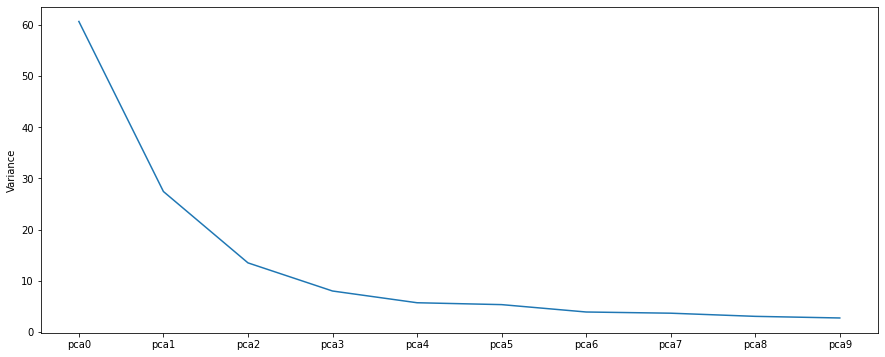

In [9]:
pl.subplots(1,1,figsize=(15,6))
pl.plot(X4_var[:40])
pl.ylabel("Variance")
# pl.savefig('Plots/PCA.pdf')

y was created with the target variable.

In [10]:
y = df['Female share of employment in senior and middle management (%)']

### Split the data further into train and test data.

Original data.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Standardised data.

In [12]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=10)

Reduced data.

In [13]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3,random_state=10)

Data with features created using PCA.

In [14]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.3,random_state=10)

### Decision Tree

In [15]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)

r2_dtr = r2_score(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test,y_pred_dtr)

In [16]:
features = pd.DataFrame(dtr.feature_importances_, index = X.columns)
features.columns = ['Features']
features=features.sort_values(by='Features',ascending=False)
features.head(10)

,Features
"Number of infant deaths, male",0.174070
"Population, female (% of total)",0.166587
"Life expectancy at birth, total (years)",0.162253
"Labor force participation rate, total (% of total population ages 15+) (national estimate)",0.115471
A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no),0.091861
"Population ages 65-69, male",0.045326
Population ages 0-14 (% of total),0.044192
"Life expectancy at age 60, female (years)",0.034651
"GNI per capita, Atlas method (current US$)",0.029608
"Employment to population ratio, 15+, total (%) (national estimate)",0.027634


In [17]:
dtr.fit(X_train,y_train)
y_pred_dtr_tr = dtr.predict(X_train)
r2_dtr_tr = r2_score(y_train, y_pred_dtr_tr)
mse_dtr_tr = mean_squared_error(y_train,y_pred_dtr_tr)

In [18]:
dtr.fit(X2_train,y2_train)
y2_pred_dtr = dtr.predict(X2_test)
r2_dtr2 = r2_score(y2_test, y2_pred_dtr)
mse_dtr2 = mean_squared_error(y2_test,y2_pred_dtr)

In [19]:
dtr.fit(X3_train,y3_train)
y3_pred_dtr = dtr.predict(X3_test)
r2_dtr3 = r2_score(y3_test, y3_pred_dtr)
mse_dtr3 = mean_squared_error(y3_test,y3_pred_dtr)

In [20]:
dtr.fit(X4_train,y4_train)
y4_pred_dtr = dtr.predict(X4_test)
r2_dtr4 = r2_score(y4_test, y4_pred_dtr)
mse_dtr4 = mean_squared_error(y4_test,y4_pred_dtr)

### Random Forest

In [21]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
r2_rfr = r2_score(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test,y_pred_rfr)

In [22]:
rfr.fit(X4_train,y4_train)
y4_pred_rfr = rfr.predict(X4_test)
r2_rfr4 = r2_score(y4_test, y4_pred_rfr)
mse_rfr4 = mean_squared_error(y4_test,y4_pred_rfr)

In [23]:
rfr.fit(X_train,y_train)
y_pred_rfr_tr = rfr.predict(X_train)
r2_rfr_tr = r2_score(y_train, y_pred_rfr_tr)
mse_rfr_tr = mean_squared_error(y_train,y_pred_rfr_tr)

### Histogram-based Gradient Boosting 

In [24]:
hist_b = HistGradientBoostingRegressor(random_state=0)
hist_b.fit(X_train,y_train)
y_pred_hist_b = hist_b.predict(X_test)
r2_hist_b = r2_score(y_test, y_pred_hist_b)
mse_hist_b = mean_squared_error(y_test,y_pred_hist_b)

In [25]:
hist_b.fit(X_train,y_train)
y_pred_hist_b_tr = hist_b.predict(X_train)
r2_hist_b_tr = r2_score(y_train, y_pred_hist_b_tr)
mse_hist_b_tr = mean_squared_error(y_train,y_pred_hist_b_tr)

### XG Boost

In [26]:
xg_b = xgb.XGBRegressor(random_state = 0)
xg_b.fit(X_train,y_train)
y_pred_xg_b = xg_b.predict(X_test)
r2_xg_b = r2_score(y_test, y_pred_xg_b)
mse_xg_b = mean_squared_error(y_test,y_pred_xg_b)

In [27]:
xg_b.fit(X_train,y_train)
y_pred_xg_b_tr = xg_b.predict(X_train)
r2_xg_b_tr = r2_score(y_train, y_pred_xg_b_tr)
mse_xg_b_tr = mean_squared_error(y_train,y_pred_xg_b_tr)

In [28]:
xg_b.fit(X2_train,y2_train)
y2_pred_xg_b = xg_b.predict(X2_test)
r2_xg_b2 = r2_score(y2_test, y2_pred_xg_b)
mse_xg_b2 = mean_squared_error(y2_test,y2_pred_xg_b)


In [29]:
xg_b.fit(X3_train,y3_train)
y3_pred_xg_b = xg_b.predict(X3_test)
r2_xg_b3 = r2_score(y3_test, y3_pred_xg_b)
mse_xg_b3 = mean_squared_error(y3_test,y3_pred_xg_b)


In [30]:
xg_b.fit(X4_train,y4_train)
y4_pred_xg_b = xg_b.predict(X4_test)
r2_xg_b4 = r2_score(y4_test, y4_pred_xg_b)
mse_xg_b4 = mean_squared_error(y4_test,y4_pred_xg_b)

### Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_train)
r2_lr_tr = r2_score(y_train, y_pred_lr)
mse_lr_tr = mean_squared_error(y_train,y_pred_lr)

In [32]:
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)

In [33]:
lr.fit(X3_train,y3_train)
y3_pred_lr = lr.predict(X3_test)
r2_lr3 = r2_score(y3_test, y3_pred_lr)
mse_lr3 = mean_squared_error(y3_test,y3_pred_lr)

In [34]:
lr.fit(X4_train,y4_train)
y4_pred_lr = lr.predict(X4_test)
r2_lr4 = r2_score(y4_test, y4_pred_lr)
mse_lr4 = mean_squared_error(y4_test,y4_pred_lr)

### Ridge Regression

In [35]:
rid = Ridge(random_state=10,alpha=0.1) 
rid.fit(X_train, y_train)
y_pred_rid_tr = rid.predict(X_train) 
r2_rid_tr = r2_score(y_train, y_pred_rid_tr)
mse_rid_tr = mean_squared_error(y_train,y_pred_rid_tr)

/Users/696556/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [36]:
rid.fit(X_train, y_train)
y_pred_rid = rid.predict(X_test) 
r2_rid = r2_score(y_test, y_pred_rid)
mse_rid = mean_squared_error(y_test,y_pred_rid)

/Users/696556/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [37]:
rid.fit(X3_train,y3_train)
y3_pred_rid = rid.predict(X3_test)
r2_rid3 = r2_score(y3_test, y3_pred_rid)
mse_rid3 = mean_squared_error(y3_test,y3_pred_rid)

In [38]:
rid.fit(X4_train,y4_train)
y4_pred_rid = rid.predict(X4_test)
r2_rid4 = r2_score(y4_test, y4_pred_rid)
mse_rid4 = mean_squared_error(y4_test,y4_pred_rid)

### Lasso Regression

In [39]:
las = Lasso(random_state=0, alpha=1) 
las.fit(X_train, y_train)
y_pred_las_tr = las.predict(X_train) 
r2_las_tr = r2_score(y_train, y_pred_las_tr)
mse_las_tr = mean_squared_error(y_train,y_pred_las_tr)

/Users/696556/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+03, tolerance: 5.361e-01
  model = cd_fast.enet_coordinate_descent(


In [40]:
las.fit(X_train, y_train)
y_pred_las = las.predict(X_test) 
r2_las = r2_score(y_test, y_pred_las)
mse_las = mean_squared_error(y_test,y_pred_las)

/Users/696556/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+03, tolerance: 5.361e-01
  model = cd_fast.enet_coordinate_descent(


In [41]:
las.fit(X3_train,y3_train)
y3_pred_las = las.predict(X3_test)
r2_las3 = r2_score(y3_test, y3_pred_las)
mse_las3 = mean_squared_error(y3_test,y3_pred_las)

/Users/696556/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.441e+03, tolerance: 5.361e-01
  model = cd_fast.enet_coordinate_descent(


In [42]:
las.fit(X4_train,y4_train)
y4_pred_las = las.predict(X4_test)
r2_las4 = r2_score(y4_test, y4_pred_las)
mse_las4 = mean_squared_error(y_train,y_pred_las_tr)

### Multi-layer Perceptron 

In [43]:
mlp = MLPRegressor(random_state=0,learning_rate='adaptive')
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
r2_mlp = r2_score(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test,y_pred_mlp)



In [44]:
mlp.fit(X_train,y_train)
y_pred_mlp_tr = mlp.predict(X_train)
r2_mlp_tr = r2_score(y_train, y_pred_mlp_tr)
mse_mlp_tr = mean_squared_error(y_train,y_pred_mlp_tr)

### Hyper Paramter tuning for Random Forest

In [45]:
param_grid = {'max_features':[10,30,50,60,80,120],
              'max_leaf_nodes':[2,5,10,15,20],
              'max_depth':[5,7,10,15],
              'min_samples_split':[2,4,6,8]
              }  
   
grid = BayesSearchCV(RandomForestRegressor(), param_grid, cv=5,scoring='r2') 
   
grid.fit(X_train, y_train) 
 

print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   

print(r2_score(y_test, grid_predictions)) 

/Users/696556/miniconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 10, 2, 4] before, using random point [5, 10, 15, 8]
  warnings.warn(
/Users/696556/miniconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 10, 2, 4] before, using random point [10, 10, 20, 2]
  warnings.warn(


OrderedDict([('max_depth', 5), ('max_features', 30), ('max_leaf_nodes', 2), ('min_samples_split', 2)])
0.06845012015969298


In [46]:
grid_predictions = grid.predict(X_train) 
   

print(r2_score(y_train, grid_predictions)) 

0.26144181163762836


### Hyper Paramter tuning for XG Boost

In [47]:
param_grid = {'eta':[0.3],
              'gamma':[220],
              'max_depth':[1,3,5,7],
              'colsample_bytree':[0.1,0.3,0.5,0.7],
              'min_child_weight':[3,5,9,10],
              'subsample':[0.1,0.3,0.5,0.7,1],
              'max_delta_step':[1,2,10,100]
              }  
   
grid = BayesSearchCV(xgb.XGBRegressor(), param_grid, cv=5,scoring='r2') 
   
grid.fit(X_train, y_train) 


BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
              scoring='r2',
              search_spaces={'colsample_bytree': [0.1, 0.3, 0.5, 0.7],
                             'eta': [0.3], 'gamma': [220],
                             'max_delta_step': [1, 2, 10, 100],
                             'max_depth': [1, 3, 5, 7],
                             'min_child_weight': [3, 5, 9, 10],
                             'subsample': [0.1, 0.3, 0.5, 0.7, 1]})

In [48]:
print(grid.best_params_)
grid_predictions = grid.predict(X_train) 
   

print(r2_score(y_train, grid_predictions)) 

OrderedDict([('colsample_bytree', 0.3), ('eta', 0.3), ('gamma', 220), ('max_delta_step', 2), ('max_depth', 5), ('min_child_weight', 10), ('subsample', 0.1)])
-0.010327163708562459


In [49]:
grid_predictions = grid.predict(X_train) 
   

print(r2_score(y_train, grid_predictions)) 

-0.010327163708562459


### Evaluation

R2 Evaluation

In [50]:
print('R2 Evaluation')
print('')
print('Decision Tree - Train: ', r2_dtr_tr)
print('Decision Tree - Test: ', r2_dtr)
print('Decision Tree - Test - Standardise: ', r2_dtr2)
print('Decision Tree - Reduced Features: ', r2_dtr3)
print('Decision Tree - PCA: ', r2_dtr4)
print('')
print('Random Forest - Train: ', r2_rfr_tr)
print('Random Forest - Test: ', r2_rfr)
print('Random Forest - Test - PCA: ', r2_rfr4)
print('')
print('Hist Gradient - Train: ', r2_hist_b_tr)
print('Hist Gradient - Test: ', r2_hist_b)
print('')
print('XG Boost - Train: ', r2_xg_b_tr)
print('XG Boost - Test: ', r2_xg_b)
print('XG Boost - Test - Standardise: ', r2_xg_b2)
print('XG Boost - Test - Reduced Features: ', r2_xg_b3)
print('XG Boost - Test - PCA: ', r2_xg_b4)
print('')
print('Linear Regression - Train: ', r2_lr_tr)
print('Linear Regression - Test: ', r2_lr)
print('Linear Regression - Test - Reduced Features: ', r2_lr3)
print('Linear Regression - Test - PCA: ', r2_lr4)
print('')
print('Lasso - Train: ', r2_las_tr)
print('Lasso - Test: ', r2_las)
print('Lasso - Test - Reduced Features: ', r2_las3)
print('Lasso - Test - PCA: ', r2_las4)
print('')
print('Ridge - Train: ', r2_rid_tr)
print('Ridge - Test: ', r2_rid)
print('Ridge - Test - Reduced Features: ', r2_rid3)
print('Ridge - Test - PCA: ', r2_rid4)
print('')
print('MLP Resgressor - Train: ', r2_mlp_tr)
print('MLP Resgressor - Test: ', r2_mlp)

R2 Evaluation

Decision Tree - Train:  1.0
Decision Tree - Test:  -0.49702566159305017
Decision Tree - Test - Standardise:  -0.49702566159305017
Decision Tree - Reduced Features:  -0.4050750865370396
Decision Tree - PCA:  -0.16403798329265817

Random Forest - Train:  0.8399463839418592
Random Forest - Test:  0.2859000751004338
Random Forest - Test - PCA:  0.13297649489524366

Hist Gradient - Train:  0.5387330592950524
Hist Gradient - Test:  0.1405108427411852

XG Boost - Train:  0.9999999974681768
XG Boost - Test:  0.4197243532863184
XG Boost - Test - Standardise:  0.4197243532863184
XG Boost - Test - Reduced Features:  -0.1205934183261348
XG Boost - Test - PCA:  -0.05594907064242416

Linear Regression - Train:  1.0
Linear Regression - Test:  -37688.33020725242
Linear Regression - Test - Reduced Features:  -35.140416833629246
Linear Regression - Test - PCA:  -0.5891138003514715

Lasso - Train:  0.7073176005685866
Lasso - Test:  -14.229649868865751
Lasso - Test - Reduced Features:  -0.8

Mean Squared Error Evaluation

In [51]:
print('Mean Square Evaluation')
print('')
print('Decision Tree - Train: ', mse_dtr_tr)
print('Decision Tree - Test: ', mse_dtr)
print('Decision Tree - Test - Standardise: ', mse_dtr2)
print('Decision Tree - Reduced Features: ', mse_dtr3)
print('Decision Tree - PCA: ', mse_dtr4)
print('')
print('Random Forest - Train: ', mse_rfr_tr)
print('Random Forest - Test: ', mse_rfr)
print('Random Forest - Test - PCA: ', mse_rfr4)
print('')
print('Hist Gradient - Train: ', mse_hist_b_tr)
print('Hist Gradient - Test: ', mse_hist_b)
print('')
print('XG Boost - Train: ', mse_xg_b_tr)
print('XG Boost - Test: ', mse_xg_b)
print('XG Boost - Test - Standardise: ', mse_xg_b2)
print('XG Boost - Test - Reduced Features: ', mse_xg_b3)
print('XG Boost - Test - PCA: ', mse_xg_b4)
print('')
print('Linear Regression - Train: ', mse_lr_tr)
print('Linear Regression - Test: ', mse_lr)
print('Linear Regression - Test - Reduced Features: ', mse_lr3)
print('Linear Regression - Test - PCA: ', mse_lr4)
print('')
print('Lasso - Train: ', mse_las_tr)
print('Lasso - Test: ', mse_las)
print('Lasso - Test - Reduced Features: ', mse_las3)
print('Lasso - Test - PCA: ', mse_las4)
print('')
print('Ridge - Train: ', mse_rid_tr)
print('Ridge - Test: ', mse_rid)
print('Ridge - Test - Reduced Features: ', mse_rid3)
print('Ridge - Test - PCA: ', mse_rid4)
print('')
print('MLP Resgressor - Train: ', mse_mlp_tr)
print('MLP Resgressor - Test: ', mse_mlp)

Mean Square Evaluation

Decision Tree - Train:  0.0
Decision Tree - Test:  174.89376536000003
Decision Tree - Test - Standardise:  174.89376536000003
Decision Tree - Reduced Features:  164.15140956
Decision Tree - PCA:  135.9916474

Random Forest - Train:  15.053253444084186
Random Forest - Test:  83.42650891907607
Random Forest - Test - PCA:  101.29218847326405

Hist Gradient - Train:  43.382763444011275
Hist Gradient - Test:  100.41196945089507

XG Boost - Train:  2.3812130738707716e-07
XG Boost - Test:  67.79215307002059
XG Boost - Test - Standardise:  67.79215307002059
XG Boost - Test - Reduced Features:  130.91612748984906
XG Boost - Test - PCA:  123.36388996600188

Linear Regression - Train:  2.7259167604930354e-15
Linear Regression - Test:  4403150.221772635
Linear Regression - Test - Reduced Features:  4222.194544739587
Linear Regression - Test - PCA:  185.65219238343244

Lasso - Train:  27.527165244822058
Lasso - Test:  1779.2419188365416
Lasso - Test - Reduced Features:  214.

Creating a dataframe for plotting models results.

In [52]:
predict = pd.DataFrame()
predict['True Value'] = y_test
predict['Decision Tree'] = y_pred_dtr
predict['Random Forest'] = y_pred_rfr
predict['Hist Gradient'] = y_pred_hist_b
predict['XG Boost'] = y_pred_xg_b
predict['MLP Regressor'] = y_pred_mlp

Plotting the XG Boost results against actual true values.

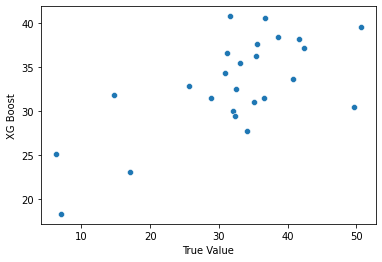

In [53]:
sns.scatterplot(data=predict,x='True Value', y='XG Boost')
pl.savefig('Plots/XG Boost_True Value.pdf')

Looking for possible correlations between the features which were given higher importance by the models.

<Axes: xlabel='Female share of employment in senior and middle management (%)', ylabel='Labor force participation rate, total (% of total population ages 15+) (national estimate)'>

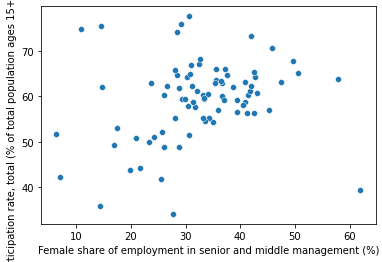

In [267]:
sns.scatterplot(data=df,x='Female share of employment in senior and middle management (%)', 
                y='Labor force participation rate, total (% of total population ages 15+) (national estimate)')


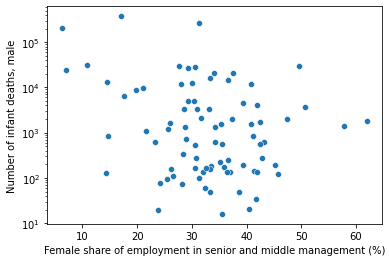

In [268]:
sns.scatterplot(data=df,x='Female share of employment in senior and middle management (%)', 
                y='Number of infant deaths, male')
# pl.xscale('log')
pl.yscale('log')